In [1]:
import pandas as pd
import numpy as np

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Balaji/Desktop/SEM 6/ML&C Lab/Datasets/penguins.csv")

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df = df.dropna()                                           #no null values
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.shape

(333, 7)

In [8]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [11]:
# df = df[df['sex']!='.']                    if array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
MALE,FEMALE = df['sex'].value_counts()
print("Males: ",MALE)
print("Females: ",FEMALE)

Males:  168
Females:  165


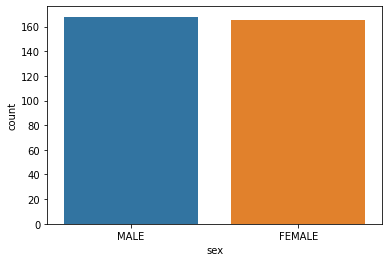

In [13]:
sb.countplot(data = df, x='sex')
plt.show()                                                        #countplot graph for column sex

In [14]:
df['island'].unique()                            #unique values in column island

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
df.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

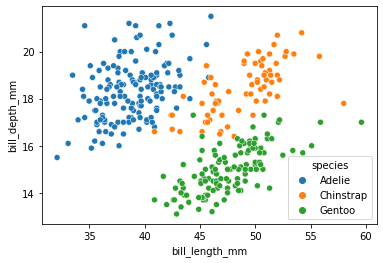

In [16]:
sb.scatterplot(x="bill_length_mm",y="bill_depth_mm", data = df,hue="species")

In [17]:
Torgersen,Biscoe,Dream = df['island'].value_counts()
print('Torgersen: ',Torgersen)                                   #no. of unique islands
print('Biscoe: ',Biscoe)
print('Dream: ',Dream)

Torgersen:  163
Biscoe:  123
Dream:  47


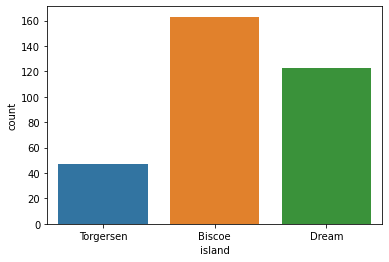

In [18]:
sb.countplot(data=df, x='island')
plt.show()

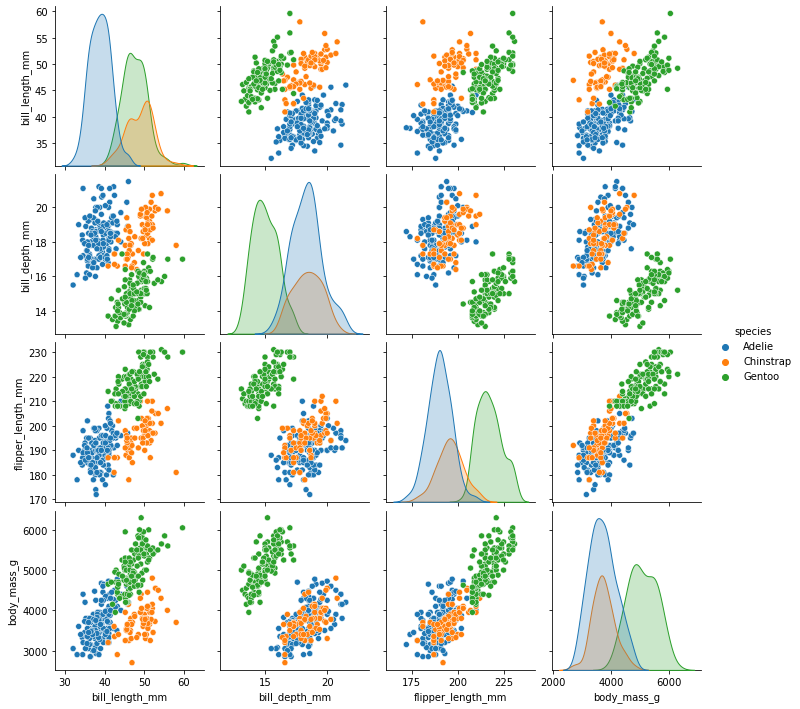

In [19]:
sb.pairplot(data=df, hue='species')                   #pairplot graph for column species
plt.show()

In [20]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [21]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)               #dropping the dummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [22]:
x = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y = df['species']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.9+ KB


In [24]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [25]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [27]:
model = DecisionTreeClassifier()
                                                                #model building and fitting
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
x_pred = model.predict(x_test)

In [29]:
print("Accuracy Score: ",accuracy_score(x_pred,y_test,)*100)                   #accuracy 95% for dataset of penguines

Accuracy Score:  95.52238805970148


In [30]:
confusion_matrix(x_pred,y_test)

array([[30,  1,  1],
       [ 1, 15,  0],
       [ 0,  0, 19]], dtype=int64)

In [31]:
print(classification_report(y_test,x_pred))

              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



In [32]:
from sklearn.metrics import plot_confusion_matrix

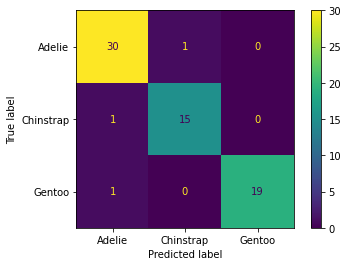

In [33]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

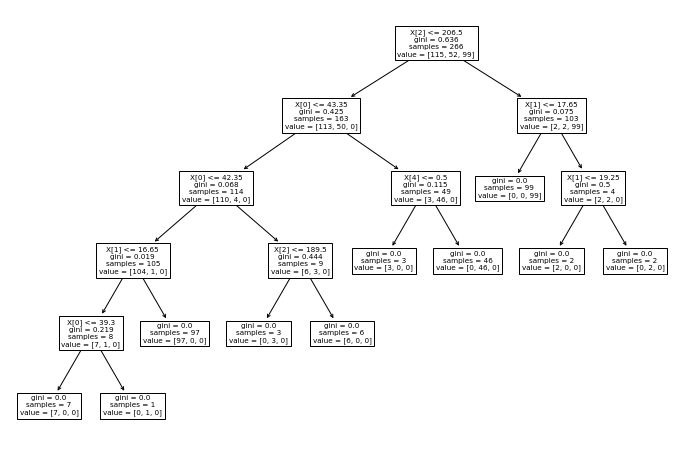

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

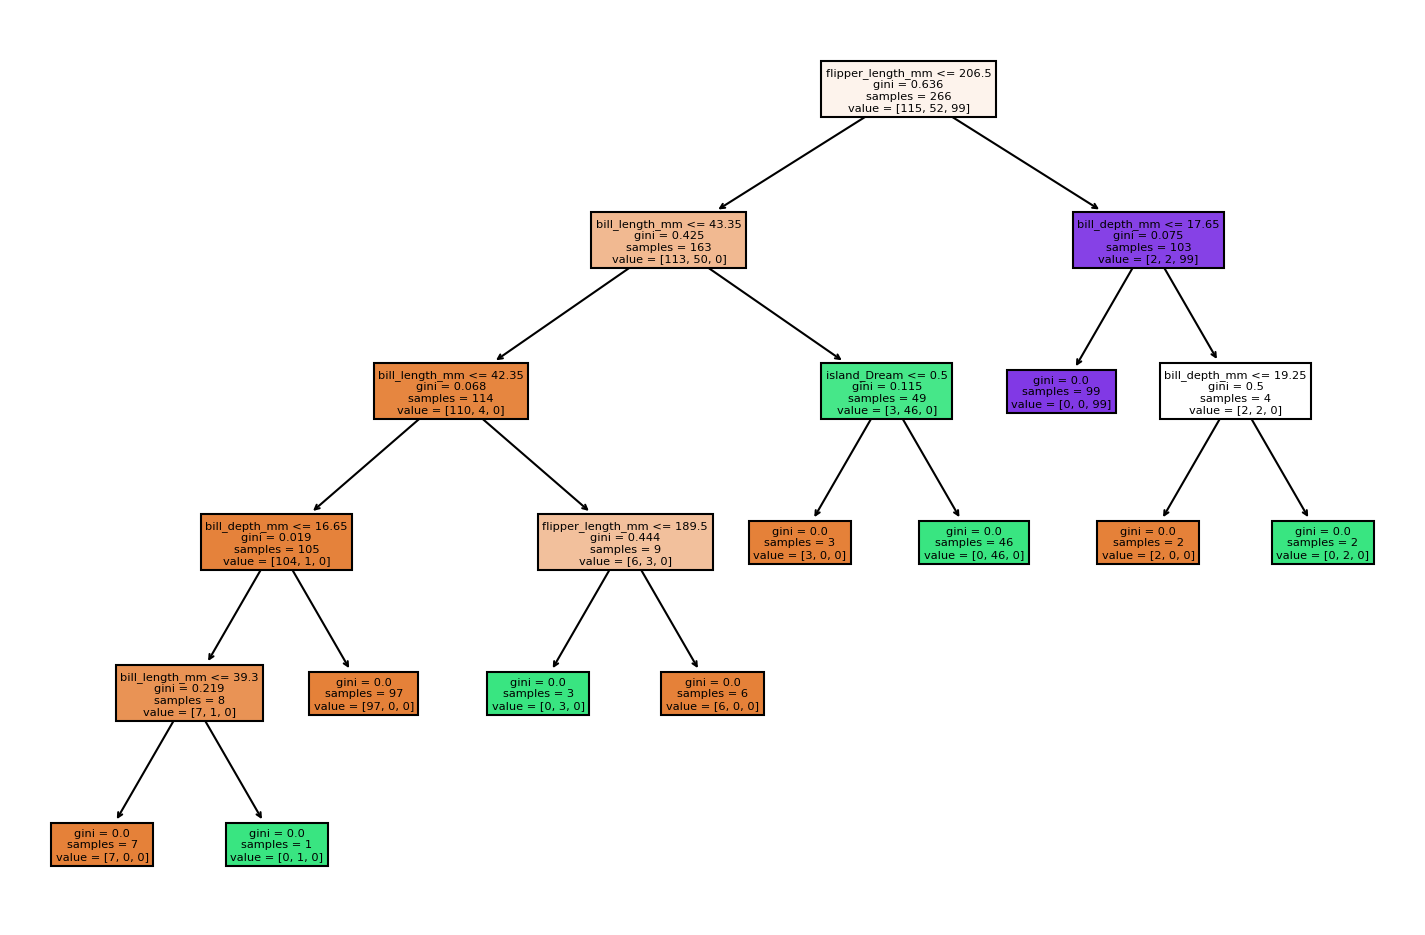

In [40]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

In [42]:
p_tree = DecisionTreeClassifier(max_depth=2)
p_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [45]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy")
entropy_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
DecisionTreeClassifier(criterion = "entropy")

DecisionTreeClassifier(criterion='entropy')

In [47]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)

              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.91        67
   macro avg       0.91      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67



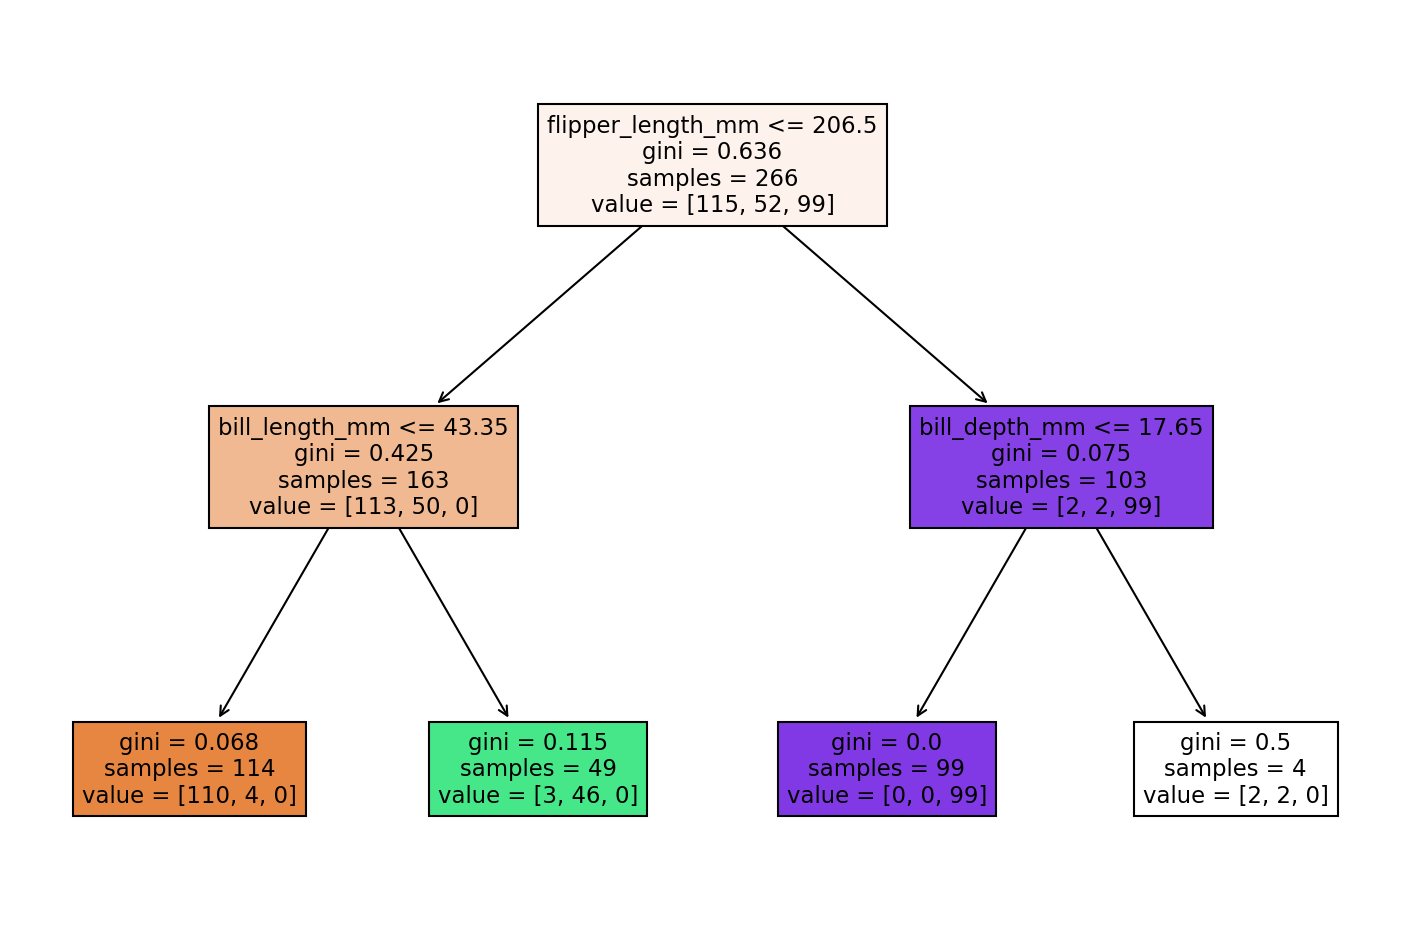

In [48]:
report_model(pruned_tree)